In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In /home/pipe11/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/pipe11/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/pipe11/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/pipe11/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/pipe11/.local/lib/python3.6/site-packages/matplotlib/mpl-data/s

In [2]:
corpus_train = pd.read_excel('../data/Corpus_spanish_train.xlsx', index_col = 0)
corpus_test = pd.read_excel('../data/Corpus_spanish_test.xlsx', index_col = 0)

corpus = pd.concat([corpus_train, corpus_test])
corpus = corpus.sample(frac = 1)

corpus.to_csv('../data/corpus_spanish.csv')

In [3]:
corpus = pd.read_csv('../data/corpus_spanish.csv')

In [4]:
corpus.head()

,Id,Category,Topic,Source,Headline,Text,Link
0,145,Fake,Sport,El Dizque,Misael Rodríguez podría no recibir medalla en ...,Misael Rodríguez podría no recibir medalla en ...,https://www.eldizque.com/misael-rodriguez-podr...
1,42,True,Society,La Vanguardia,El auge del sake y cómo los restaurantes japon...,El auge del sake y cómo los restaurantes japon...,http://www.lavanguardia.com/comer/tendencias/2...
2,598,True,Entertainment,BBC News,"Muere Steve Ditko, el célebre creador de Spide...","Muere Steve Ditko, el célebre creador de Spide...",http://www.bbc.com/mundo/noticias-44750873
3,75,True,Society,Marca,"Taco con ""Estrella Solitaria""","Taco con ""Estrella Solitaria""\nDemarcas Lawren...",http://www.marca.com/claro-mx/opinion/opinion/...
4,438,True,Politics,Aristegui noticias,"Inadmisible e irresponsable, plagio en tesis d...","Inadmisible e irresponsable, plagio en tesis d...",https://aristeguionline.info/2208/mexico/inadm...


Checking values types

In [5]:
corpus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 971 entries, 0 to 970
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Id        971 non-null    int64 
 1   Category  971 non-null    object
 2   Topic     971 non-null    object
 3   Source    971 non-null    object
 4   Headline  971 non-null    object
 5   Text      971 non-null    object
 6   Link      971 non-null    object
dtypes: int64(1), object(6)
memory usage: 53.2+ KB


Checking if there are NA Values

In [6]:
corpus.isnull().sum()

Id          0
Category    0
Topic       0
Source      0
Headline    0
Text        0
Link        0
dtype: int64

Number of news per Category 'Fake' and 'True'

Category
Fake    480
True    491
dtype: int64


<AxesSubplot:xlabel='Category'>

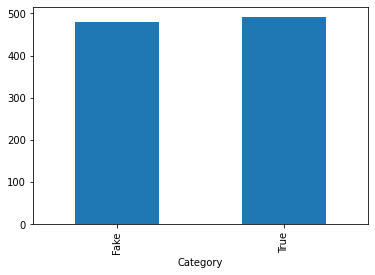

In [7]:
plot_cat = corpus.groupby('Category').size()
print(plot_cat)

plot_cat.plot.bar()

Total news in the corpus per Topic

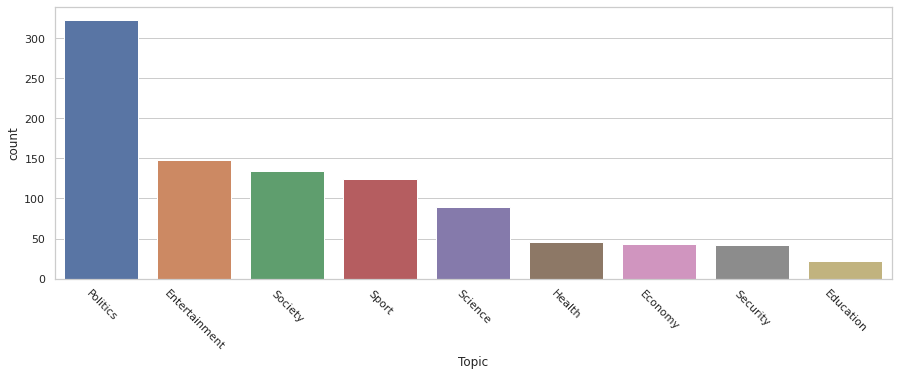

In [9]:
plot_topic = corpus.groupby('Topic').size().sort_values(ascending = False)

plt.figure(figsize = (15,5))
sns.set(style = 'whitegrid')
ax = sns.countplot(x = 'Topic' , order = corpus['Topic'].value_counts().index, data = corpus)
sticks = plt.xticks(rotation = -45)

Fake news and True news per topic

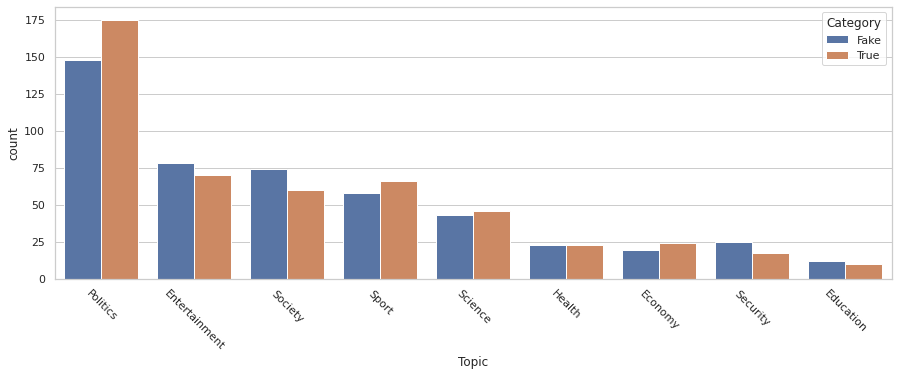

In [10]:
plt.figure(figsize = (15,5))
sns.set(style = 'whitegrid')
ax = sns.countplot(x = 'Topic' , order = corpus['Topic'].value_counts().index, hue = 'Category', data = corpus)
sticks = plt.xticks(rotation = -45)

In [11]:
plot_source = corpus.groupby('Source').size().sort_values(ascending = False)
plot_source

Source
El Dizque            135
El Ruinaversal        94
El país               67
Excelsior             45
El Universal          40
                    ... 
NEWSner                1
Nacion321              1
News Week español      1
Nippon                 1
20 Minutos             1
Length: 167, dtype: int64

In [12]:
grouped = corpus.groupby(['Source']).size().sort_values(ascending = False)
grouped

Source
El Dizque            135
El Ruinaversal        94
El país               67
Excelsior             45
El Universal          40
                    ... 
NEWSner                1
Nacion321              1
News Week español      1
Nippon                 1
20 Minutos             1
Length: 167, dtype: int64

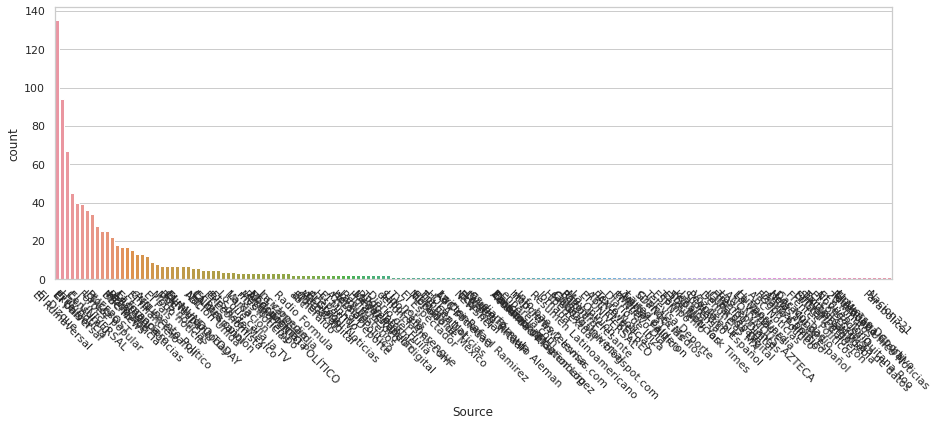

In [14]:
plot_source = corpus.groupby('Source').size().sort_values(ascending = False)

plt.figure(figsize = (15, 5))
sns.set(style = 'whitegrid')
ax = sns.countplot(x = 'Source' , order = corpus['Source'].value_counts().index, data = corpus)
sticks = plt.xticks(rotation = -45)